In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
file=pd.read_csv("D:\Acmegrade\Files\movie_metadata.csv")
file

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,49,Comedy|Drama,...,6,English,Canada,49,49,2013,470,7.7,49.00,84
5039,Color,49,43,43,49,319,Valorie Curry,841,49,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,49,49,593,7.5,16.00,32000
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,49,Drama|Horror|Thriller,...,3,English,USA,49,1400,2013,0,6.3,49.00,16
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,9,English,USA,PG-13,49,2012,719,6.3,2.35,660


In [3]:
file.shape

(5043, 28)

In [7]:
print(file.groupby("country").size())

country
49                         5
Afghanistan                1
Argentina                  4
Aruba                      1
Australia                 55
                        ... 
Turkey                     1
UK                       448
USA                     3807
United Arab Emirates       1
West Germany               3
Length: 66, dtype: int64


In [8]:
print(file.groupby("language").size())

language
49              12
Aboriginal       2
Arabic           5
Aramaic          1
Bosnian          1
Cantonese       11
Chinese          3
Czech            1
Danish           5
Dari             2
Dutch            4
Dzongkha         1
English       4704
Filipino         1
French          73
German          19
Greek            1
Hebrew           5
Hindi           28
Hungarian        1
Icelandic        2
Indonesian       2
Italian         11
Japanese        18
Kannada          1
Kazakh           1
Korean           8
Mandarin        26
Maya             1
Mongolian        1
None             2
Norwegian        4
Panjabi          1
Persian          4
Polish           4
Portuguese       8
Romanian         2
Russian         11
Slovenian        1
Spanish         40
Swahili          1
Swedish          5
Tamil            1
Telugu           1
Thai             3
Urdu             1
Vietnamese       1
Zulu             2
dtype: int64


In [13]:
new_data=file.iloc[:,4:6]
new_data

,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
...,...,...
5038,2,318
5039,49,319
5040,0,0
5041,0,489


In [19]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(new_data)

KMeans(n_clusters=5)

In [21]:
kmeans.cluster_centers_

array([[  151.29382199,   420.67350785],
       [17621.21212121,   596.10606061],
       [  210.77011494, 11126.43678161],
       [12490.38461538,   605.93269231],
       [17545.45454545, 14545.45454545]])

In [22]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
result=pd.DataFrame(kmeans.labels_,columns=["Cluster No"])

In [25]:
result

,Cluster No
0,0
1,0
2,0
3,4
4,0
...,...
5038,0
5039,0
5040,0
5041,0


In [26]:
op=pd.concat([file,result],axis=1)

In [27]:
op

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Cluster No
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,0
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,0
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,4
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,12,7.1,49.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,49,Comedy|Drama,...,English,Canada,49,49,2013,470,7.7,49.00,84,0
5039,Color,49,43,43,49,319,Valorie Curry,841,49,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,49,49,593,7.5,16.00,32000,0
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,49,Drama|Horror|Thriller,...,English,USA,49,1400,2013,0,6.3,49.00,16,0
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,English,USA,PG-13,49,2012,719,6.3,2.35,660,0


In [28]:
op.to_excel("D:\\Acmegrade\\Files\\kmeans_output.xlsx")

In [36]:
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 4775, 1: 66, 2: 87, 3: 104, 4: 11}


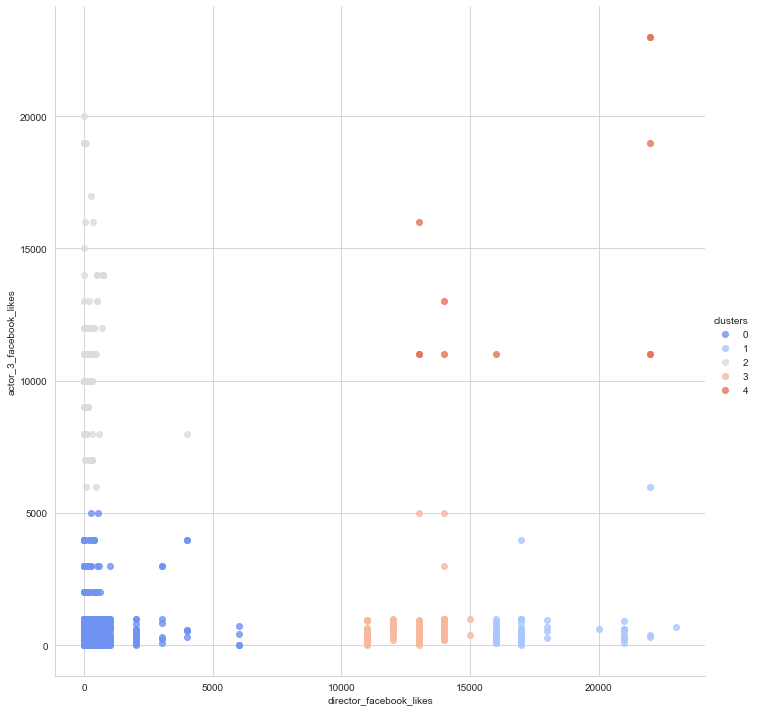

In [49]:
new_data["clusters"]=kmeans.labels_
sns.set_style("whitegrid")
sns.lmplot(x="director_facebook_likes",y="actor_3_facebook_likes",data=new_data,hue='clusters',palette="coolwarm",height=10,fit_reg=False)

{0: 2901, 1: 102, 2: 66, 3: 8, 4: 53, 5: 19, 6: 15, 7: 45, 8: 1831, 9: 3}


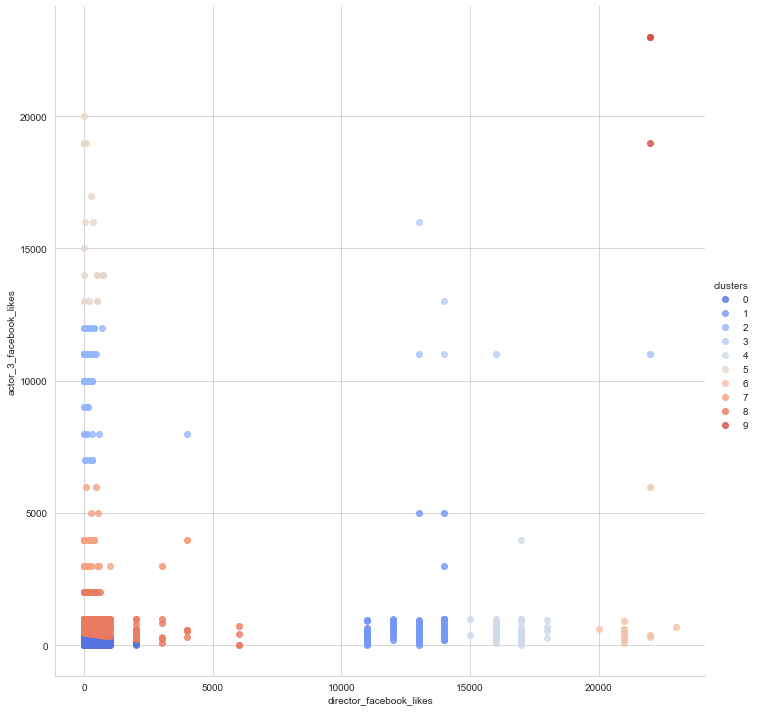

In [50]:
kmeans=KMeans(n_clusters=10)
kmeans.fit(new_data)
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))
new_data["clusters"]=kmeans.labels_
sns.set_style("whitegrid")
sns.lmplot(x="director_facebook_likes",y="actor_3_facebook_likes",data=new_data,hue='clusters',palette="coolwarm",height=10,fit_reg=False)